# Coursework: Comparison of efficiency of classes of steganographic algorithms
## Program: LSB based Image steganography

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import math
from PIL import Image

In [2]:
def stringToBinary(a):
    l = []
    res = ''.join(format(ord(i), '08b') for i in a)
    return res

In [3]:
def binaryToString(a):
    return chr(binaryToInt(a))

In [4]:
def integerToBinary(a):
    return int(bin(a)[2:])

In [5]:
def binaryToInt(binary): 
    int_val, i, n = 0, 0, 0
    while(binary != 0): 
        a = binary % 10
        int_val = int_val + a * pow(2, i) 
        binary = binary//10
        i += 1
    return int_val

In [6]:
def PSNR_and_MSE(originalImage, encodedImage):
    mse = np.mean((originalImage - encodedImage) ** 2)
    if(mse == 0): 
        return 100
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
    print(f"MSE value is {mse}")
    print(f"PSNR value is {psnr} dB")

In [7]:
def encodingMessage(imageName, key, message):
    inputImage = cv2.imread(imageName, cv2.IMREAD_UNCHANGED);
    outputImage = inputImage
    delimeter = "$"
    height= inputImage.shape[0]
    width = inputImage.shape[1]
    dim = 1
    if(len(inputImage.shape) > 2):
        dim = inputImage.shape[2]

    binKey = stringToBinary(key)
    binMsg = stringToBinary(message + delimeter)
    lenBinKey = len(binKey)
    lenBinMsg = len(binMsg)

    index = -1
    count = 0
    pixel = 0

    for k in range(dim):
        for i in range(0, height, 1):
            for j in range(0, width, 1):
                index = index + 1;
                if((int)(binKey[index%lenBinKey]) == 1):
                    if(count < lenBinMsg):
                        if(dim == 1):
                            pixel = integerToBinary(inputImage[i][j])
                            newPixel = ((int)(pixel/10)*10) + (int)(binMsg[count])
                            outputImage[i][j] = binaryToInt(newPixel);
                        else:
                            pixel = integerToBinary(inputImage[i][j][k])
                            newPixel = ((int)(pixel/10)*10) + (int)(binMsg[count])
                            outputImage[i][j][k] = binaryToInt(newPixel);
                        count = count + 1;
    cv2.imwrite("Out.bmp", outputImage)
    return inputImage, outputImage;

In [8]:
def extractData(key):
    inputImage = cv2.imread("Out.bmp");
    height= inputImage.shape[0]
    width = inputImage.shape[1]
    dim = inputImage.shape[2]
  
    binKey = stringToBinary(key)
    lenBinKey = len(binKey)
    delimeter = "$"
    index = -1
    lenPixel = 0
    exMsg = ""
    newPixel = 0

    for k in range(dim):
        for i in range(0, height, 1):
            for j in range(0, width, 1):
                index += 1
                if((int)(binKey[index%lenBinKey]) == 1):
                    pixel = integerToBinary(inputImage[i][j][k])
                    newPixel = newPixel * 10 + pixel%10
                    lenPixel += 1
                    if(lenPixel == 8):
                        exMsg += binaryToString(newPixel)
                        lenPixel = 0
                        newPixel = 0
                        if(delimeter in exMsg):
                            return exMsg[:-1]

In [9]:
def ReadTxtFile(TxtFileName):
    text = open(TxtFileName, "r")
    data = text.read()
    text.close()
    return data

In [10]:
def WriteTxtFile(Text,TxtFileName):
    with open(TxtFileName, "w") as file:
        file.write(Text)

Extracted message : Comparison of efficiency of classes of steganographic algorithms


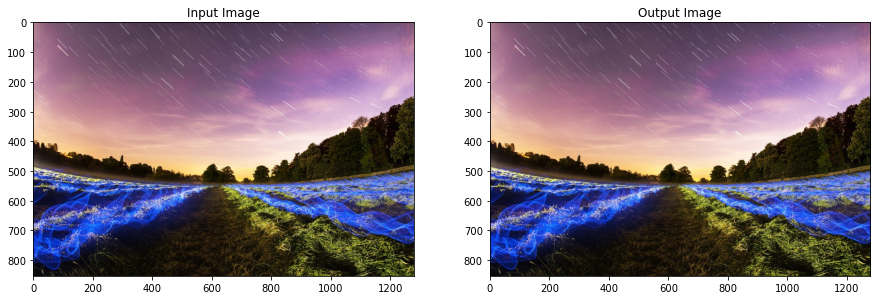

In [11]:
fileName = "In.bmp"

#key = ReadTxtFile("Key.txt")
key = 'Coursework'

#message = ReadTxtFile("EncodingMessage.txt")
message = "Comparison of efficiency of classes of steganographic algorithms"
inputImage, outputImage = encodingMessage(fileName, key, message)
extractedMessage = extractData(key)

plt.figure(figsize=(15,15));
plt.subplot(1,2,1),plt.imshow(cv2.cvtColor(inputImage, cv2.COLOR_BGR2RGB)), plt.title("Input Image")
plt.subplot(1,2,2),plt.imshow(cv2.cvtColor(outputImage, cv2.COLOR_BGR2RGB)), plt.title("Output Image") 

#WriteTxtFile(extractedMessage,"ExtractedMessage.txt")
print("Extracted message : {}".format(extractedMessage))

In [12]:
fIn = cv2.imread("In.bmp")
fOut = cv2.imread("Out.bmp", 1)
PSNR_and_MSE(fIn, fOut)

MSE value is 8.273495506057053e-05
PSNR value is 88.95391325528558 dB
